In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [8,5]
mpl.rcParams['figure.dpi'] = 192

In [3]:
!ls ../../output/seeds/mlp

metadata  trainloss  validloss


In [4]:
PATH = '../../output/seeds/mlp/trainloss'

In [5]:
def get_results(path):
    csvs = os.listdir(path)
    paths = [os.path.join(PATH, x) for x in csvs]
    res = [pd.read_csv(x) for x in paths]
    losses = [np.array(x['loss']) for x in res]
    losses = pd.concat([pd.Series(x) for x in losses], axis=1)
    return losses

In [6]:
def plot_loss_distribution(losses):
    """Plot aggregate results of series.

    Parameters
    ----------
    losses : pd.DataFrame
      Dataframe containing random walks as columns.
    """
    u, m, l = loss_stats(losses.to_numpy()[::100,:])
    #sns.set_context("paper")
    plt.plot(u, label='Upper')
    plt.plot(m, label='Mean')
    plt.plot(l, label='Lower')
    plt.legend()
    

def loss_stats(losses):
    """Get mean and standard deviation of loss curves across seeds.

    Parameters
    ----------
    losses : pd.DataFrame
      Dataframe containing loss curves across seeds as columns.
    """
    mean = np.array(losses.mean(axis=1))
    std_dev = np.array(losses.std(axis=1))
    upper = mean + std_dev
    lower = mean - std_dev
    stats = [upper, mean, lower]
    return stats

In [7]:
losses = get_results(PATH)
# convert to epoch losses
print(losses.shape)
losses = losses.groupby(losses.index//30).sum()
print(losses.shape)

(60000, 30)
(2000, 30)


0.006696487910169552

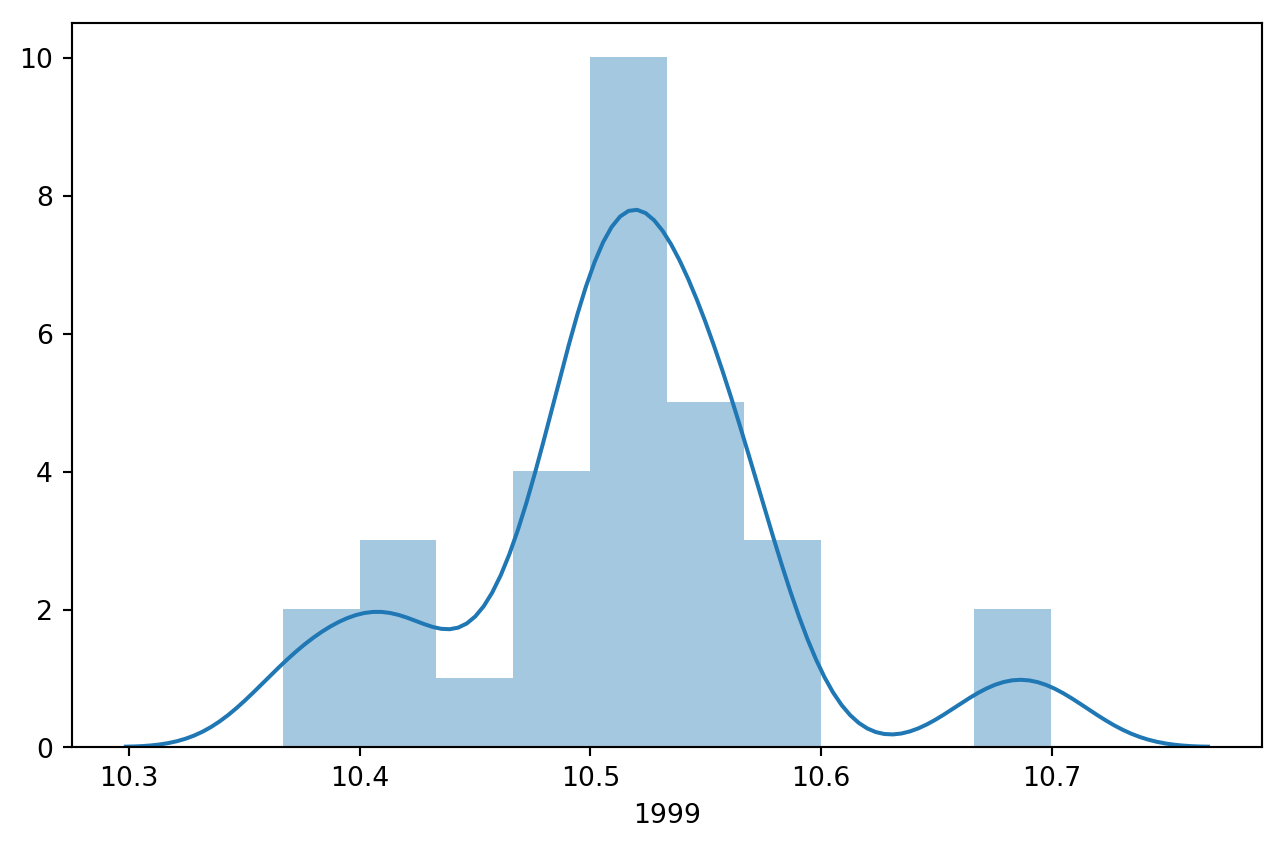

In [8]:
sns.distplot(losses.iloc[-1,:])
final_loss = losses.iloc[-1,:]
np.std(final_loss)/np.mean(final_loss)

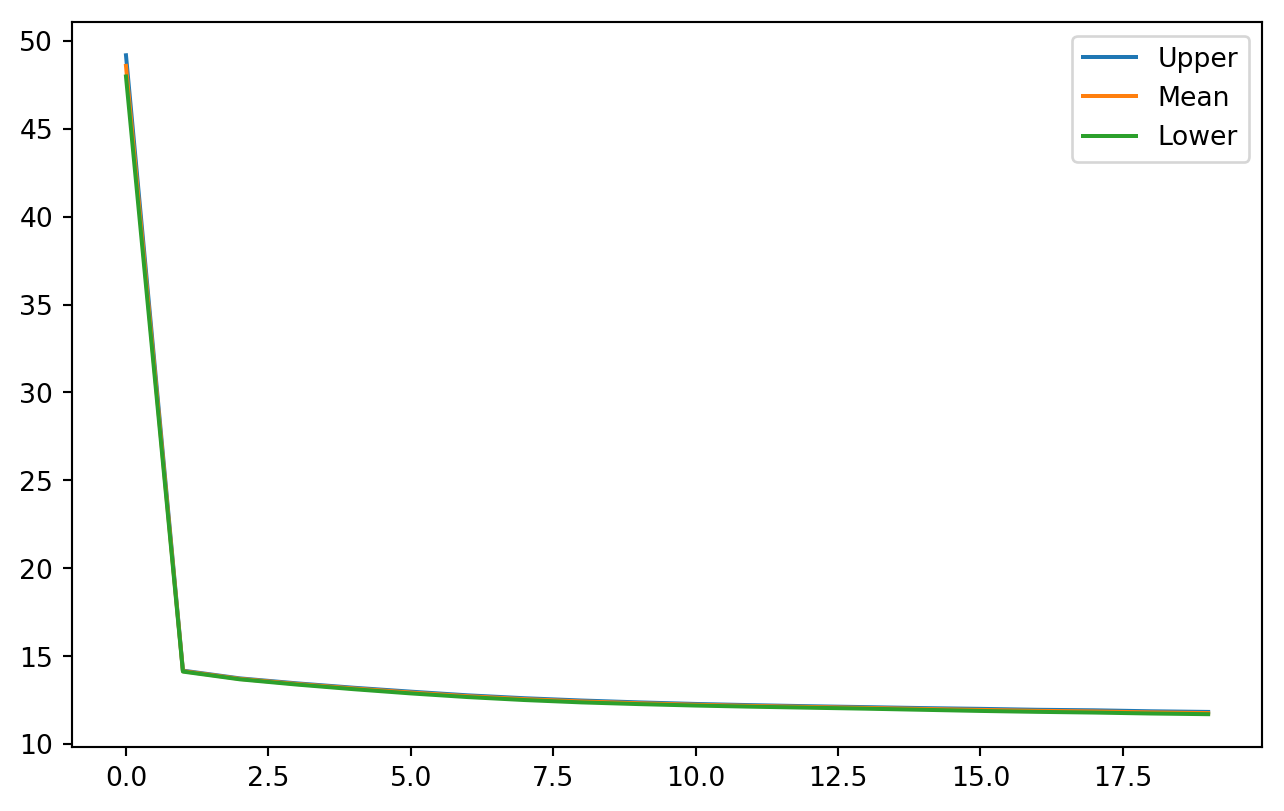

In [9]:
plot_loss_distribution(losses)